<a href="https://colab.research.google.com/github/ginttone/multi_deeplearning/blob/master/reuter_LSTM_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reuter 

## Datasets

In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train),(x_test,y_test)= tf.keras.datasets.reuters.load_data(num_words=10000)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


((8982,), (8982,), (2246,), (2246,))

In [3]:
print(y_train[50], x_train[50])

4 [1, 1479, 1197, 71, 8, 25, 1479, 1197, 640, 71, 304, 471, 80, 9, 1379, 1901, 4530, 6797, 79, 5, 8144, 71, 175, 80, 58, 4, 1279, 5, 63, 32, 20, 5, 4, 326, 175, 80, 335, 7, 10, 845, 31, 4, 221, 9, 108, 259, 1479, 1197, 640, 8, 16, 600, 69, 68, 11, 15, 6, 8144, 21, 397, 321, 6, 438, 1761, 3072, 79, 5, 8144, 1040, 894, 1051, 617, 80, 4, 617, 80, 23, 1051, 172, 3814, 3206, 8144, 175, 79, 9, 1379, 6, 264, 395, 3814, 3206, 79, 1479, 1197, 9, 25, 323, 8, 4, 8144, 80, 23, 381, 43, 42, 205, 50, 77, 33, 909, 9, 3509, 22, 216, 6, 216, 17, 12]


In [4]:
len(x_train[50]), len(x_train[400]), len(x_train[200])

(118, 90, 212)

In [5]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)

In [6]:
 len(pad_x_train[50]) # pad_x_train[50]

500

In [7]:
import numpy as np
# len(np.unique(y_train)) 
np.unique(y_train).shape

(46,)

## Make model

In [8]:
model = tf.keras.models.Sequential()

* Input layer


In [9]:
model.add(tf.keras.layers.Embedding(input_length=500, input_dim=10000 ,output_dim=24))

* Hidden layer


In [10]:
model.add(tf.keras.layers.LSTM(24, return_sequences=True, activation='tanh'))
model.add(tf.keras.layers.LSTM(12, activation='tanh'))

* Output layer


In [11]:
model.add(tf.keras.layers.Dense(46,activation='softmax'))

* Gadget


In [12]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy', metrics=['acc'])

## Train

In [13]:
hist = model.fit(pad_x_train, y_train, epochs=100, validation_split=0.3 , batch_size=256)

Epoch 1/100
25/25 [==============================] - 23s 760ms/step - loss: 3.7499 - acc: 0.2146 - val_loss: 3.5544 - val_acc: 0.3532
Epoch 2/100
25/25 [==============================] - 18s 722ms/step - loss: 3.2414 - acc: 0.3510 - val_loss: 2.9629 - val_acc: 0.3532
Epoch 3/100
25/25 [==============================] - 18s 728ms/step - loss: 2.8092 - acc: 0.3510 - val_loss: 2.6444 - val_acc: 0.3532
Epoch 4/100
25/25 [==============================] - 18s 732ms/step - loss: 2.5828 - acc: 0.3510 - val_loss: 2.4949 - val_acc: 0.3532
Epoch 5/100
25/25 [==============================] - 18s 729ms/step - loss: 2.4868 - acc: 0.3510 - val_loss: 2.4340 - val_acc: 0.3532
Epoch 6/100
25/25 [==============================] - 18s 727ms/step - loss: 2.4480 - acc: 0.3510 - val_loss: 2.4089 - val_acc: 0.3532
Epoch 7/100
25/25 [==============================] - 18s 731ms/step - loss: 2.4316 - acc: 0.3510 - val_loss: 2.3969 - val_acc: 0.3532
Epoch 8/100
25/25 [==============================] - 18s 732ms

## Evaluation


1. 학습을 시켰던 데이터

In [14]:
model.evaluate(pad_x_train, y_train)

281/281 [==============================] - 18s 63ms/step - loss: 1.1464 - acc: 0.7155


[1.1463791131973267, 0.715542197227478]

2. 학습 안시킨 데이터 전처리

In [15]:
pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=500)
pad_x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=500)

In [16]:
def pad_make(x_data):
  pad_x = tf.keras.preprocessing.sequence.pad_sequences(x_data, maxlen=500)
  return pad_x

In [17]:
pad_make_x = pad_make(x_test)

In [18]:
model.evaluate(pad_make_x, y_test)

71/71 [==============================] - 4s 63ms/step - loss: 2.0871 - acc: 0.5588


[2.0870888233184814, 0.5587711334228516]

In [19]:
model.evaluate(pad_x_test, y_test)

71/71 [==============================] - 4s 63ms/step - loss: 2.0871 - acc: 0.5588


[2.0870888233184814, 0.5587711334228516]

* 1.과  2. 비교

  loss가 비슷하니 학습이 잘 됬구나 혹은, loss가 차이 많이나니 학습이 잘 안됬네 알수있다.

## Plot

In [20]:
import matplotlib.pyplot as plt

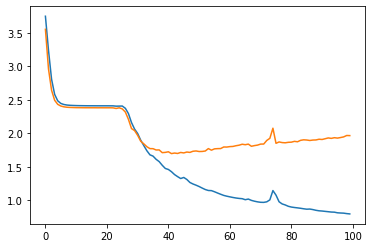

In [21]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

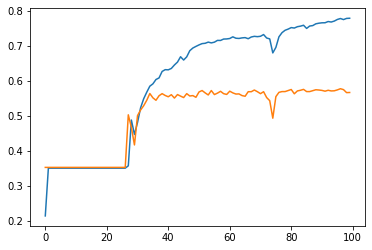

In [22]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.show()

## Predict

In [28]:
y_train_pred = model.predict(pad_x_train)
y_train_pred[0]

array([1.34189846e-04, 9.35930409e-04, 6.49393769e-05, 9.64566469e-01,
       1.35996863e-02, 1.04961029e-04, 2.72191333e-04, 1.24424827e-04,
       1.67065847e-03, 2.39670480e-04, 2.67960655e-04, 8.36291350e-04,
       1.61872653e-04, 7.83000607e-04, 1.30889719e-04, 1.08970075e-04,
       3.04259825e-03, 2.80207489e-04, 7.74221917e-05, 2.26024352e-03,
       7.58686278e-04, 4.78713104e-04, 1.85642784e-04, 1.36145973e-04,
       8.21059366e-05, 1.74547022e-04, 7.40007381e-05, 1.37989977e-04,
       5.83261193e-04, 4.78822185e-04, 8.08872574e-04, 2.48714909e-03,
       8.80151405e-04, 1.62185257e-04, 2.12685496e-04, 2.79993226e-04,
       1.61395568e-04, 2.19686655e-04, 5.11454069e-04, 3.75393778e-04,
       9.35811186e-05, 1.96555091e-04, 2.20420741e-04, 1.79073351e-04,
       2.94901256e-04, 1.63938428e-04], dtype=float32)

## argmax

In [33]:
y_pred = np.argmax(y_train_pred, axis=1)
y_pred.shape

(8982,)

In [35]:
len(y_train)

8982

## Classification_report

In [36]:
from sklearn.metrics import classification_report

1. 와 

In [37]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.58      0.84      0.69       432
           2       0.36      0.58      0.44        74
           3       0.93      0.96      0.94      3159
           4       0.90      0.88      0.89      1949
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        16
           8       0.53      0.22      0.31       139
           9       0.22      0.74      0.34       101
          10       0.31      0.42      0.35       124
          11       0.44      0.68      0.53       390
          12       0.00      0.00      0.00        49
          13       0.54      0.15      0.23       172
          14       0.16      0.42      0.23        26
          15       0.00      0.00      0.00        20
          16       0.49      0.34      0.40       444
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2.를 비교

장르 0 단위인 것 들이 있다 = 문제가 있다

판단:  0 ,5 , 6 , 7, 12, 15 ... -> 장르는 나누어져있는데 해당붑분이 없다

In [40]:
y_test_pred = model.predict(pad_x_test)

In [41]:
y_pred =np.argmax(y_test_pred, axis=1)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.34      0.52      0.41       105
           2       0.07      0.15      0.10        20
           3       0.88      0.90      0.89       813
           4       0.71      0.65      0.68       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       0.08      0.24      0.12        25
          10       0.07      0.20      0.10        30
          11       0.20      0.34      0.25        83
          12       0.00      0.00      0.00        13
          13       0.11      0.03      0.04        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.19      0.19      0.19        99
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




해결 : 스플릿 해줘야함